In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sp=pd.read_csv('../Data/supermarket_sales .csv')
sp.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
sp.shape
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
sp.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
sp.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [29]:
sp['Time']=pd.to_datetime(sp['Time'])
sp['Hour']=(sp['Time']).dt.hour

 Visualization
 1. Customer gender
 2. Customer type
 3. Customer branch
 4. Checking the different payment methods used
 5. Payment method distribution in all branches
 6. The rating distribution in 3 branches
 7. Max sales time
 8. Rating and sales

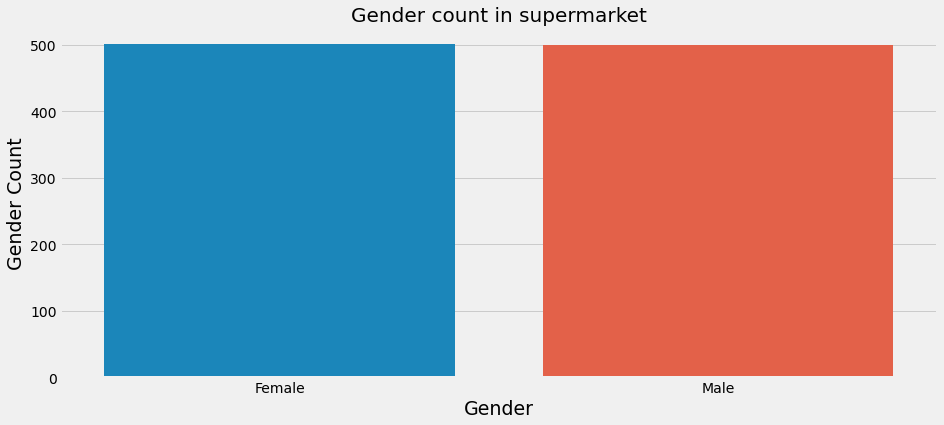

In [42]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax=sns.countplot('Gender',data=sp)
ax.set_xlabel(xlabel='Gender', fontsize=19)
ax.set_ylabel(ylabel='Gender Count', fontsize=19)
ax.set_title(label='Gender count in supermarket', fontsize=20);

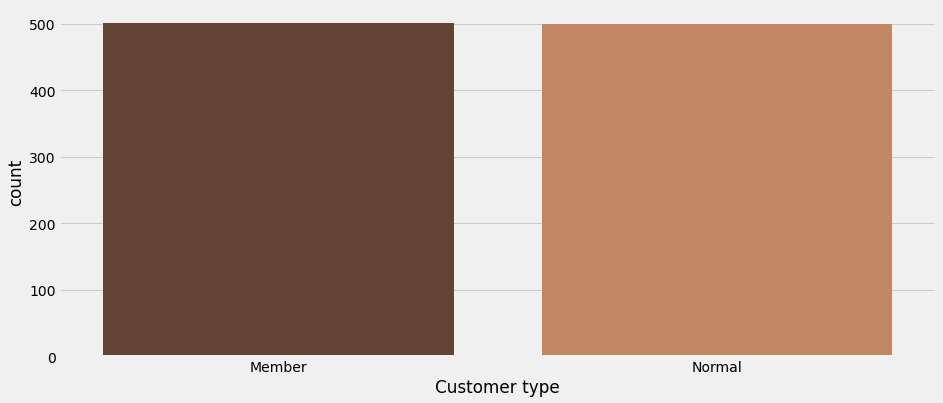

In [22]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ct=sns.countplot('Customer type', data=sp, palette='copper')

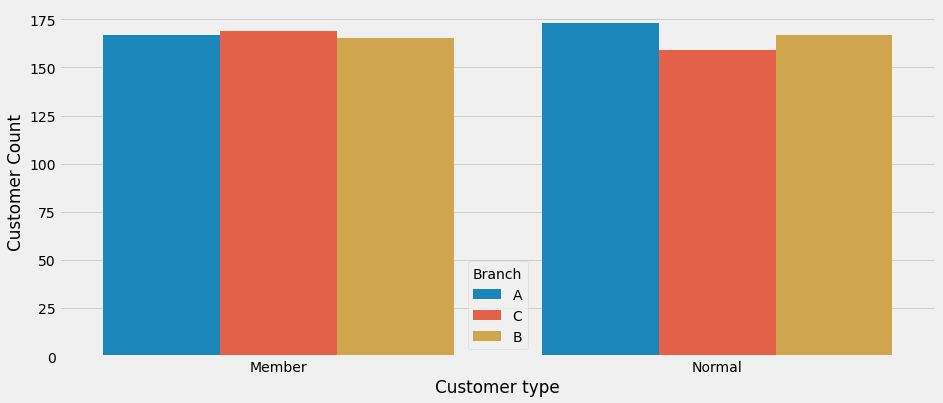

In [41]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
branch=sns.countplot(x='Customer type',hue='Branch', data=sp)
branch.set_ylabel('Customer Count');

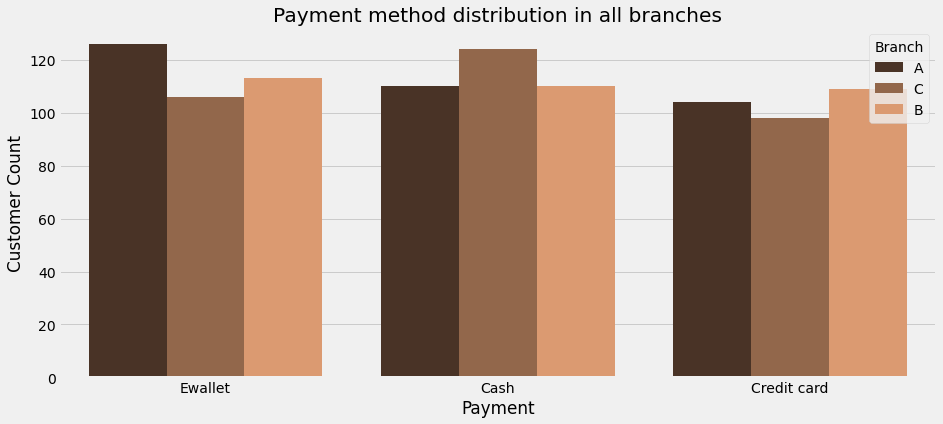

In [40]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
bs=sns.countplot(x='Payment', hue='Branch', data=sp, palette='copper')
bs.set_title('Payment method distribution in all branches')
bs.set_ylabel('Customer Count');

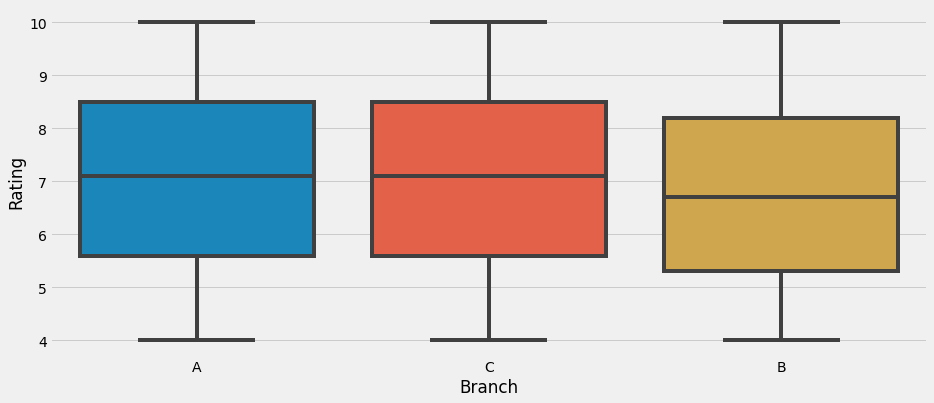

In [37]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
br=sns.boxplot(x='Branch',y='Rating',data=sp)

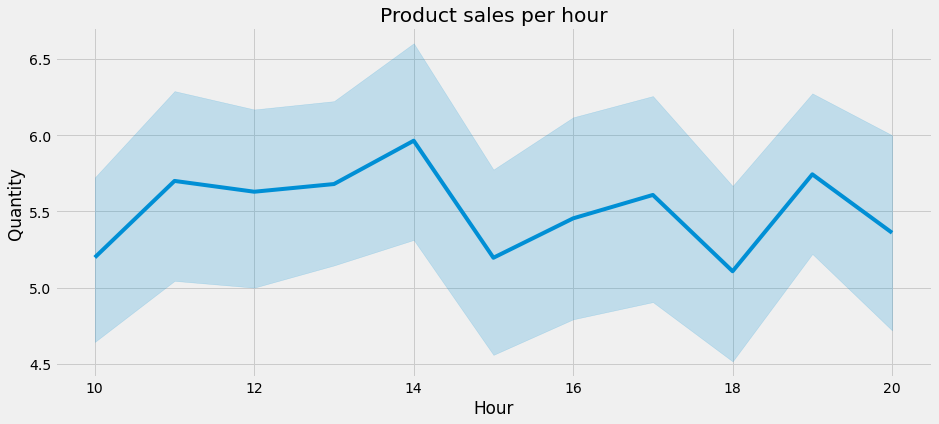

In [43]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
sns.lineplot(x='Hour',y='Quantity',data=sp).set_title('Product sales per hour');

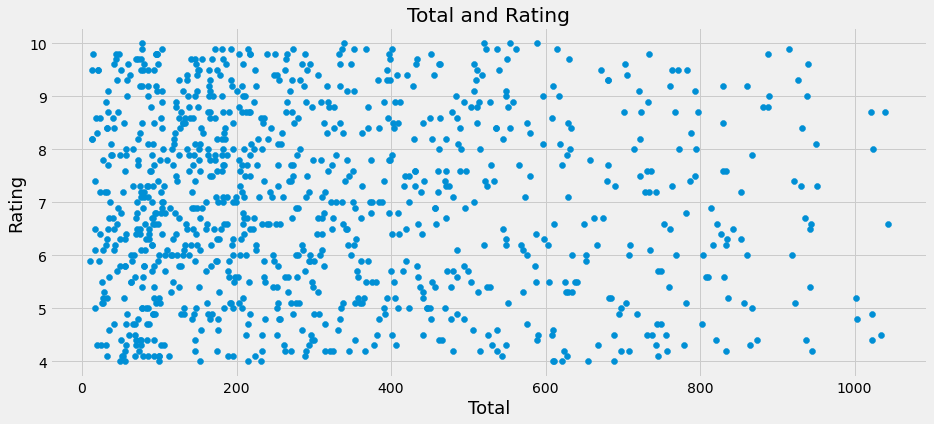

In [91]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
plt.scatter(x='Total',y='Rating', data=sp)
plt.xlabel('Total',fontsize=18)
plt.ylabel('Rating',fontsize=18)
plt.title('Total and Rating');

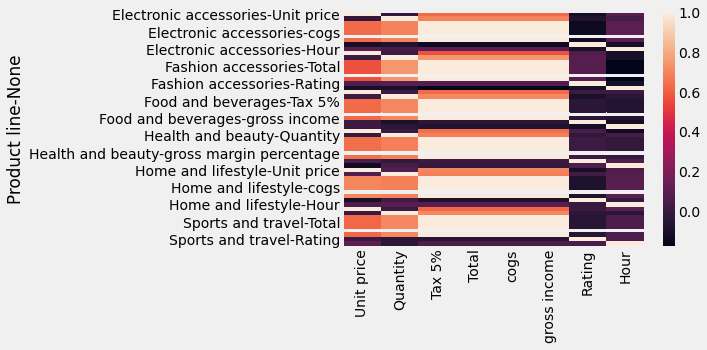

In [90]:
pl=sp.groupby('Product line').corr()
pl.drop(['gross margin percentage'], axis=1, inplace=True)
sns.heatmap(data=pl);

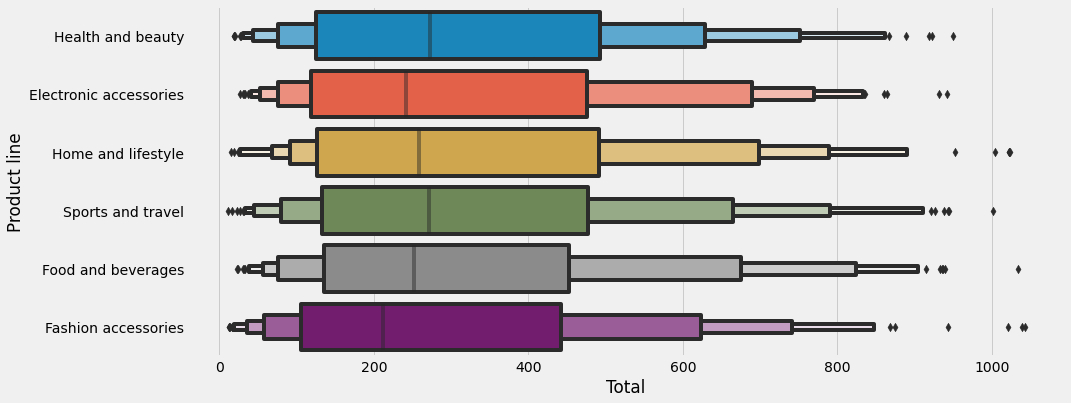

In [77]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax=sns.boxenplot(y='Product line', x='Total', data=sp)

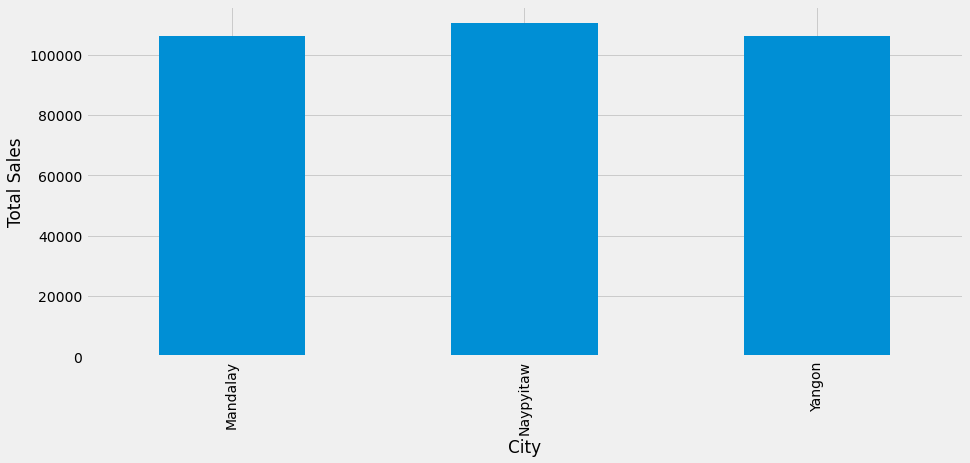

In [89]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
bycity=sp.groupby('City').sum()['Total']
bycity.plot(kind='bar')
plt.ylabel('Total Sales');

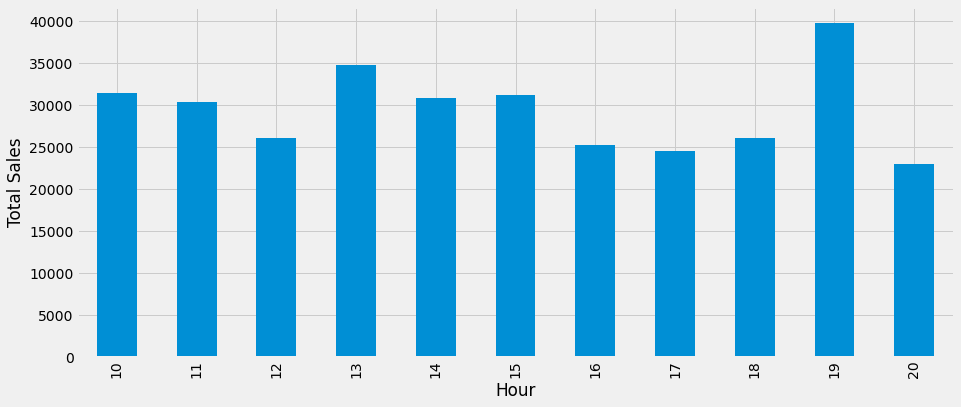

In [92]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
byHour=sp.groupby('Hour').sum()['Total']
byHour.plot(kind='bar')
plt.ylabel('Total Sales');

<AxesSubplot:xlabel='Product line'>

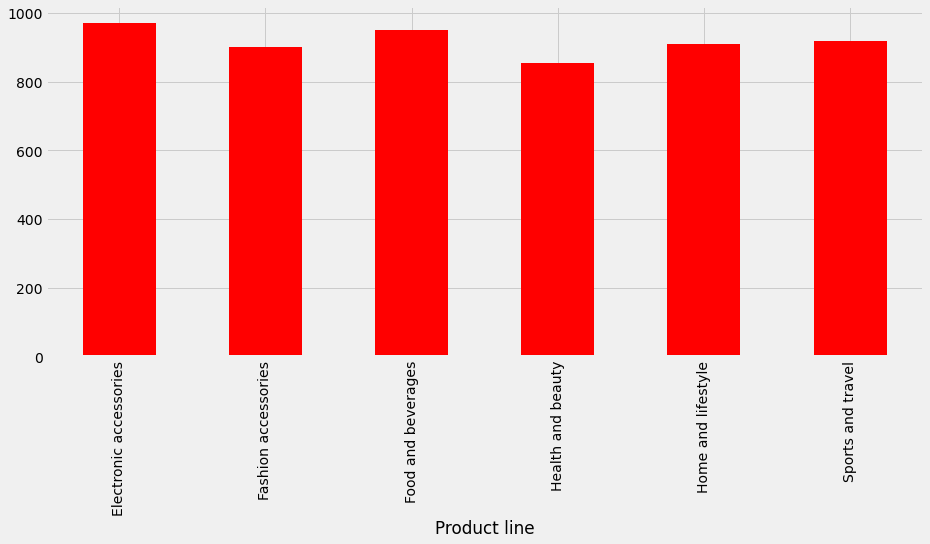

In [104]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
byProduct=sp.groupby('Product line').sum()['Quantity']
byProduct.plot(kind='bar', color='red')